In [14]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

n_epochs = 5
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=batch_size_test, shuffle=True)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

#Define model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './data/model.pth')
      torch.save(optimizer.state_dict(), './data/optimizer.pth')
    
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/home/godwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.3052, Accuracy: 755/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.327951
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.305318
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.301605
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.292976
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.313002
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.295925
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.298003
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.291209
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.287460
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.299870
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.284454
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.286990
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.289692
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.276099
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.296288
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.282216
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.291572
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.265543
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.265260
Train Epoch: 1 [12160/6

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.322170
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.640868
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.449435
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.485412
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.399377
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.500266
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.396907
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.471660
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.309297
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.402971
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.306840
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.527431
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.379776
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.499971
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.588521
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.399211
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.461726
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.611031
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.388474
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.300506


Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.372416
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.340974
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.308002
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.351579
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.855145
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.268005
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.283935
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.276329
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.284780
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.382755
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.413394
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.164505
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.293769
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.476778
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.307825
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.312458
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.158221
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.512675
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.123578
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.274314


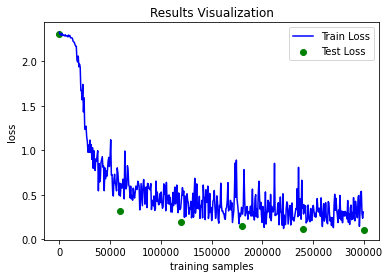

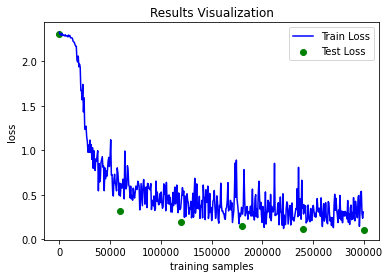

In [15]:
#Plot results
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='green')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('Results Visualization')
plt.xlabel('training samples')
plt.ylabel('loss')
fig